In [1]:
# Needed for one hot encoding
def convert_to_categories(n):
    if n == 0 :
        return 0
    if n == 5:
        return 1
    if n == 10:
        return 2
    
def convert_to_binary(n):
    if n == 0:
        return 0
    else:
        return 1

In [2]:
import csv
import os
import numpy as np


TRAINING_DATA_PATH='/home/mlsg/DiskB/others/ratios'
VALIDATION_DATA_PATH='/home/mlsg/DiskA/others/ratios'
conversion = convert_to_binary

# CSV files format
# [frame, eye aspect ratio, eye_circularity, mouth aspect ratio, mar/ear, 4 more(normalized versions of left 4 in order)]

# Should return an array
def get_row(row):
    return [float(val) for val in row]

label_0 = []
label_10 = []

# For now we only care about eye aspect ratio
for csv_dir in os.listdir(TRAINING_DATA_PATH):
# # TODO: Change to load more data
# for csv_dir in ['12']:
    full_path = TRAINING_DATA_PATH + '/' + csv_dir
    endings = ['0_svm', '10_svm']
    
    for ending in endings:
        rows = []
        filename = full_path + '/' + ending + '.csv'
        if os.path.exists(filename):
            with open(filename) as f:
                reader = csv.reader(f)
                for row in reader:
                    rows.append(get_row(row))

            if ending == '0_svm':
                label_0 += (rows)
            else:
                label_10 += (rows)


In [3]:
# Generate the validation data
validation_label_0 = []
validation_label_10 = []
# For now we only care about eye aspect ratio
for csv_dir in os.listdir(VALIDATION_DATA_PATH):
# # TODO: Change to load more data
# for csv_dir in ['12']:
    full_path = VALIDATION_DATA_PATH + '/' + csv_dir
    endings = ['0_svm', '10_svm']
    
    for ending in endings:
        rows = []
        filename = full_path + '/' + ending + '.csv'
        if os.path.exists(filename):
            with open(filename) as f:
                reader = csv.reader(f)
                for row in reader:
                    rows.append(get_row(row))
                                   
            if ending == '0_svm':
                validation_label_0 += (rows)
            else:
                validation_label_10 += (rows)




In [4]:
# Train data
data_x = label_0 + label_10
data_y = [0] * len(label_0) + [1] * len(label_10)

# # Label training data
# new_data_y = []
# for i in range(0, len(data_y), TIME_LENGTH):
#     new_data_y.append(conversion(data_y[i]))
# data_y = np.array(new_data_y)

# Test Data
x_validation_data = validation_label_0 + validation_label_10
y_validation_data = [0] * len(validation_label_0) + [1] * len(validation_label_10)

# # Test data
# new_valid_data_y = []
# # Label vaidation data
# for i in range(0, len(y_validation_data), TIME_LENGTH):
#     new_valid_data_y.append(conversion(y_validation_data[i]))
# y_validation_data = np.array(new_valid_data_y)

# len(x_validation_data)

# input_length = len(data_y)
# data_x.shape


In [5]:
# import random

# data_x = data_x.reshape(len(data_x) // TIME_LENGTH, TIME_LENGTH, 1)
# x_validation_data = np.array(x_validation_data).reshape(len(x_validation_data) // TIME_LENGTH, TIME_LENGTH, 1)

# c = list(zip(data_x, data_y))
# random.shuffle(c)
# data_x, data_y = zip(*c)

# d = list(zip(x_validation_data, y_validation_data))
# random.shuffle(d)
# x_validation_data, y_validation_data = zip(*d)

data_x = np.array(data_x)
data_y = np.array(data_y)
x_validation_data = np.array(x_validation_data)
y_validation_data = np.array(y_validation_data)

In [6]:
len(x_validation_data)


# ALL HAIL SVMMMMMMMMMMMMMMM TOO IMBA

81735

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [x * 0.2 for x in range(26, 50)], 'kernel': ['rbf']},
]
grid = GridSearchCV(svm.SVC(),param_grid,refit=True)
grid.fit(data_x, data_y)
print(grid.best_estimator_)

In [25]:
grid.best_estimator_

SVC(C=9.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
# Highest accuracy at 0.00025 of 69.2%. It has a precision of 82.8 and recall of 52.25
# rbf did not improve accuracy

# Using Disk B as training, we achieved 80.6% accuracy with C = 2 and Linear SVC
# FUCK SVC reaches 82.5% using rbf lol with C=2

from sklearn import svm, metrics

clf = svm.SVC(200, probability=True)
# clf = svm.LinearSVC(C=2, probability=True)

clf.fit(data_x, data_y)

y_pred = clf.predict(x_validation_data)
confidence = clf.predict_proba(x_validation_data)
print("Accuracy:",metrics.accuracy_score(y_validation_data, y_pred))
print("Precision:",metrics.precision_score(y_validation_data, y_pred))
print("Recall:",metrics.recall_score(y_validation_data, y_pred))

Accuracy: 0.8405823698537958
Precision: 0.8866737902610289
Recall: 0.7570970516931258


In [ ]:
# DO NOT TOUCH

# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Flatten, Bidirectional
# from keras.optimizers import Adam, RMSprop, SGD
# from keras.utils import to_categorical

# # DO NOT TOUCH, # DO NOT TOUCH

# # Alternative optimize
# sgd = SGD(lr=0.01, momentum=0.9)

# model = Sequential()

# # Use to_categorical to convert to one hot encoding
# encoded_data_y = to_categorical(data_y)
# encoded_y_validation_data = to_categorical(y_validation_data)

# # model.add(Dense(SEQUENCE_LENGTH, activation='sigmoid'))
# model.add((LSTM(4, return_sequences=True,
#                        input_shape=(TIME_LENGTH, 4,),
#                        dropout=0.7)))

# model.add(Flatten())
# # Dense is fully connected layer. 16 hidden units
# # activation for lstm is basically sigmoid or tanh
# model.add(Dense(4, activation='relu')) #FC1
# model.add(Dropout(0.7))
# model.add(Dense(3, activation='softmax'))#Output Layer
# optimizer = 'adam'
# # Compile the model
# model.compile(
#     optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# summary = model.fit(data_x, encoded_data_y, epochs=40, validation_data=(x_validation_data, encoded_y_validation_data), batch_size=20)
# # summary = model.fit(data_x, data_y, epochs=2, validation_split=0.5, batch_size=10)

# model.summary()

In [ ]:
# Joshua notes
"""
Switching to categorical cross entropy drastically increased performance
My guess is that this is because we have 3 categories in the first place, so we had to use some form of hot encoding 
to get the correct answer

My first try was only using mouth aspect ratio and mar/ear, both for the normalized and unnormaized values

My second try switched to all the normalized ratios, and it improved things even more

Ths above was done with dropout 0.6 and LSTM number 8, with adam optimizer

Increasing number of neurons also drastically overfits which is a problem

Best so far, 8, 4, 4, 3 around 50% accuracy

Notes and TODO: try varying the 5 to 15 and more for the sequences, maybe feed in more frames also.

dropout 0.7, 4,3,3 with 240, 5 achieved decent results of mid 60s to low 70s with 20 epochs, past that overfitting destroys everythng
"""


In [ ]:
from sklearn.model_selection import cross_val_score
print(confidence)
cross_val_score(clf, x_validation_data, y_validation_data, scoring='roc_auc')

[[7.61947083e-01 2.38052917e-01]
 [7.49617409e-01 2.50382591e-01]
 [7.36560686e-01 2.63439314e-01]
 ...
 [2.97111148e-08 9.99999970e-01]
 [3.05345191e-08 9.99999969e-01]
 [3.14614618e-08 9.99999969e-01]]


In [ ]:
import statistics
scores = [0.85342123, 0.88868524, 0.89367091]
print(statistics.mean(scores))
print(statistics.stdev(scores))

In [12]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_validation_data, [c[1] for c in confidence])
roc_auc = metrics.auc(fpr, tpr)

%store -r fpr_mlp
%store -r tpr_mlp
%store -r fpr_cnn
%store -r tpr_cnn

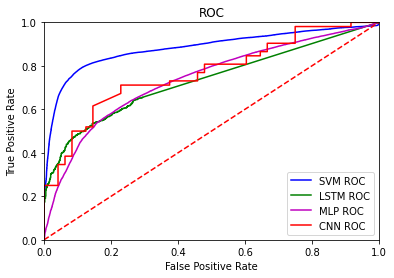

In [13]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label='SVM ROC')
plt.plot(lstm_fpr, lstm_tpr, 'g', label='LSTM ROC')
plt.plot(fpr_mlp, tpr_mlp, 'm', label='MLP ROC')
plt.plot(fpr_cnn, tpr_cnn, 'r', label='CNN ROC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
lstm_fpr = [0.        , 0.        , 0.00104167, 0.00104167, 0.00208333,
       0.00208333, 0.00416667, 0.00416667, 0.00520833, 0.00520833,
       0.00625   , 0.00625   , 0.00729167, 0.00729167, 0.00833333,
       0.00833333, 0.009375  , 0.009375  , 0.01041667, 0.01041667,
       0.01145833, 0.01145833, 0.01354167, 0.01354167, 0.01458333,
       0.01458333, 0.015625  , 0.015625  , 0.01666667, 0.01666667,
       0.01770833, 0.01770833, 0.01875   , 0.01875   , 0.01979167,
       0.01979167, 0.02083333, 0.02083333, 0.021875  , 0.021875  ,
       0.02291667, 0.02291667, 0.025     , 0.025     , 0.02708333,
       0.02708333, 0.028125  , 0.028125  , 0.02916667, 0.02916667,
       0.03125   , 0.03125   , 0.03229167, 0.03229167, 0.03333333,
       0.03333333, 0.034375  , 0.034375  , 0.03541667, 0.03541667,
       0.03645833, 0.03645833, 0.03854167, 0.03854167, 0.03958333,
       0.03958333, 0.040625  , 0.040625  , 0.04270833, 0.04270833,
       0.04375   , 0.04375   , 0.04479167, 0.04479167, 0.04583333,
       0.04583333, 0.046875  , 0.046875  , 0.04791667, 0.04791667,
       0.04895833, 0.04895833, 0.05      , 0.05      , 0.05104167,
       0.05104167, 0.05208333, 0.05208333, 0.053125  , 0.053125  ,
       0.05520833, 0.05520833, 0.05833333, 0.05833333, 0.059375  ,
       0.059375  , 0.06041667, 0.06041667, 0.06145833, 0.06145833,
       0.0625    , 0.0625    , 0.06354167, 0.06354167, 0.065625  ,
       0.065625  , 0.06666667, 0.06666667, 0.06979167, 0.06979167,
       0.07083333, 0.07083333, 0.071875  , 0.071875  , 0.07291667,
       0.07291667, 0.07395833, 0.07395833, 0.07604167, 0.07604167,
       0.078125  , 0.078125  , 0.07916667, 0.07916667, 0.08020833,
       0.08020833, 0.08125   , 0.08125   , 0.08229167, 0.08229167,
       0.08333333, 0.08333333, 0.084375  , 0.084375  , 0.08645833,
       0.08645833, 0.0875    , 0.0875    , 0.08854167, 0.08854167,
       0.09166667, 0.09166667, 0.09375   , 0.09375   , 0.096875  ,
       0.096875  , 0.09791667, 0.09791667, 0.09895833, 0.09895833,
       0.1       , 0.1       , 0.10104167, 0.10104167, 0.10625   ,
       0.10625   , 0.10833333, 0.10833333, 0.11145833, 0.11145833,
       0.11770833, 0.11770833, 0.11979167, 0.11979167, 0.12083333,
       0.12083333, 0.12291667, 0.12291667, 0.12395833, 0.12395833,
       0.128125  , 0.128125  , 0.12916667, 0.12916667, 0.13229167,
       0.13229167, 0.13333333, 0.13333333, 0.13541667, 0.13541667,
       0.13645833, 0.13645833, 0.1375    , 0.1375    , 0.13854167,
       0.13854167, 0.13958333, 0.13958333, 0.14375   , 0.14375   ,
       0.14479167, 0.14479167, 0.14895833, 0.14895833, 0.153125  ,
       0.153125  , 0.15520833, 0.15520833, 0.15625   , 0.15625   ,
       0.16354167, 0.16354167, 0.165625  , 0.165625  , 0.16770833,
       0.16770833, 0.17291667, 0.17291667, 0.175     , 0.175     ,
       0.17708333, 0.17708333, 0.178125  , 0.178125  , 0.17916667,
       0.17916667, 0.18125   , 0.18125   , 0.18333333, 0.18333333,
       0.184375  , 0.184375  , 0.18645833, 0.18645833, 0.1875    ,
       0.1875    , 0.18854167, 0.18854167, 0.18958333, 0.18958333,
       0.19479167, 0.19479167, 0.19895833, 0.19895833, 0.20104167,
       0.20104167, 0.20208333, 0.20208333, 0.203125  , 0.203125  ,
       0.20625   , 0.20625   , 0.209375  , 0.209375  , 0.21041667,
       0.21041667, 0.215625  , 0.215625  , 0.21875   , 0.21875   ,
       0.21979167, 0.21979167, 0.22083333, 0.22083333, 0.221875  ,
       0.221875  , 0.22604167, 0.22604167, 0.228125  , 0.228125  ,
       0.22916667, 0.22916667, 0.23020833, 0.23020833, 0.23125   ,
       0.23125   , 0.23229167, 0.23229167, 0.23333333, 0.23333333,
       0.23541667, 0.23541667, 0.23854167, 0.23854167, 0.240625  ,
       0.240625  , 0.24583333, 0.24583333, 0.246875  , 0.246875  ,
       0.24791667, 0.24791667, 0.24895833, 0.24895833, 0.25      ,
       0.25      , 0.25208333, 0.25208333, 0.25520833, 0.25520833,
       0.25833333, 0.25833333, 0.26145833, 0.26145833, 0.2625    ,
       0.2625    , 0.26354167, 0.26354167, 0.26458333, 0.26458333,
       0.265625  , 0.265625  , 0.26875   , 0.26875   , 0.27083333,
       0.27083333, 0.27291667, 0.27291667, 0.278125  , 0.278125  ,
       0.28020833, 0.28020833, 0.28229167, 0.28229167, 0.28541667,
       0.28541667, 0.290625  , 0.290625  , 0.29375   , 0.29375   ,
       0.29583333, 1.        ]
lstm_tpr = [0.00104167, 0.17291667, 0.17291667, 0.17395833, 0.17395833,
       0.190625  , 0.190625  , 0.20208333, 0.20208333, 0.22916667,
       0.22916667, 0.23645833, 0.23645833, 0.24166667, 0.24166667,
       0.24270833, 0.24270833, 0.25208333, 0.25208333, 0.25520833,
       0.25520833, 0.25729167, 0.25729167, 0.26041667, 0.26041667,
       0.26458333, 0.26458333, 0.26875   , 0.26875   , 0.27708333,
       0.27708333, 0.28020833, 0.28020833, 0.2875    , 0.2875    ,
       0.30208333, 0.30208333, 0.30416667, 0.30416667, 0.30520833,
       0.30520833, 0.30729167, 0.30729167, 0.30833333, 0.30833333,
       0.309375  , 0.309375  , 0.31666667, 0.31666667, 0.32291667,
       0.32291667, 0.32395833, 0.32395833, 0.32604167, 0.32604167,
       0.33125   , 0.33125   , 0.33541667, 0.33541667, 0.3375    ,
       0.3375    , 0.340625  , 0.340625  , 0.34583333, 0.34583333,
       0.346875  , 0.346875  , 0.34895833, 0.34895833, 0.353125  ,
       0.353125  , 0.35520833, 0.35520833, 0.36041667, 0.36041667,
       0.36458333, 0.36458333, 0.36666667, 0.36666667, 0.378125  ,
       0.378125  , 0.38333333, 0.38333333, 0.38541667, 0.38541667,
       0.39583333, 0.39583333, 0.39895833, 0.39895833, 0.40104167,
       0.40104167, 0.40208333, 0.40208333, 0.40833333, 0.40833333,
       0.409375  , 0.409375  , 0.41041667, 0.41041667, 0.41354167,
       0.41354167, 0.421875  , 0.421875  , 0.42708333, 0.42708333,
       0.43020833, 0.43020833, 0.43958333, 0.43958333, 0.440625  ,
       0.440625  , 0.44375   , 0.44375   , 0.44791667, 0.44791667,
       0.44895833, 0.44895833, 0.453125  , 0.453125  , 0.45520833,
       0.45520833, 0.45729167, 0.45729167, 0.45833333, 0.45833333,
       0.459375  , 0.459375  , 0.4625    , 0.4625    , 0.46354167,
       0.46354167, 0.465625  , 0.465625  , 0.46666667, 0.46666667,
       0.46979167, 0.46979167, 0.471875  , 0.471875  , 0.47291667,
       0.47291667, 0.475     , 0.475     , 0.48020833, 0.48020833,
       0.48125   , 0.48125   , 0.48229167, 0.48229167, 0.48333333,
       0.48333333, 0.48541667, 0.48541667, 0.4875    , 0.4875    ,
       0.48854167, 0.48854167, 0.49375   , 0.49375   , 0.49791667,
       0.49791667, 0.49895833, 0.49895833, 0.5       , 0.5       ,
       0.50104167, 0.50104167, 0.50729167, 0.50729167, 0.50833333,
       0.50833333, 0.51041667, 0.51041667, 0.5125    , 0.5125    ,
       0.51354167, 0.51354167, 0.51875   , 0.51875   , 0.51979167,
       0.51979167, 0.521875  , 0.521875  , 0.52291667, 0.52291667,
       0.525     , 0.525     , 0.52604167, 0.52604167, 0.534375  ,
       0.534375  , 0.53541667, 0.53541667, 0.5375    , 0.5375    ,
       0.53958333, 0.53958333, 0.54166667, 0.54166667, 0.54270833,
       0.54270833, 0.54375   , 0.54375   , 0.546875  , 0.546875  ,
       0.54791667, 0.54791667, 0.54895833, 0.54895833, 0.55      ,
       0.55      , 0.55104167, 0.55104167, 0.55208333, 0.55208333,
       0.55416667, 0.55416667, 0.55520833, 0.55520833, 0.55833333,
       0.55833333, 0.559375  , 0.559375  , 0.5625    , 0.5625    ,
       0.56354167, 0.56354167, 0.56458333, 0.56458333, 0.56666667,
       0.56666667, 0.56979167, 0.56979167, 0.57291667, 0.57291667,
       0.57395833, 0.57395833, 0.57604167, 0.57604167, 0.58020833,
       0.58020833, 0.58229167, 0.58229167, 0.584375  , 0.584375  ,
       0.58541667, 0.58541667, 0.58645833, 0.58645833, 0.5875    ,
       0.5875    , 0.58958333, 0.58958333, 0.590625  , 0.590625  ,
       0.59166667, 0.59166667, 0.59583333, 0.59583333, 0.596875  ,
       0.596875  , 0.59791667, 0.59791667, 0.59895833, 0.59895833,
       0.6       , 0.6       , 0.60208333, 0.60208333, 0.603125  ,
       0.603125  , 0.60416667, 0.60416667, 0.60520833, 0.60520833,
       0.60625   , 0.60625   , 0.60833333, 0.60833333, 0.61041667,
       0.61041667, 0.6125    , 0.6125    , 0.61458333, 0.61458333,
       0.615625  , 0.615625  , 0.61666667, 0.61666667, 0.61770833,
       0.61770833, 0.62395833, 0.62395833, 0.62708333, 0.62708333,
       0.628125  , 0.628125  , 0.63020833, 0.63020833, 0.634375  ,
       0.634375  , 0.640625  , 0.640625  , 0.64270833, 0.64270833,
       0.64375   , 0.64375   , 0.64479167, 0.64479167, 0.64791667,
       0.64791667, 0.64895833, 0.64895833, 0.65104167, 0.65104167,
       0.65208333, 0.65208333, 0.653125  , 0.653125  , 0.65625   ,
       0.65625   , 1.        ]